## Exploration 2-3
### Digits Classifier

### Table of Contents
    1.Data Definition
    2.EDA
        t-SNE
    3.Model Training
    4.Model Evaluation

In [3]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 준비

In [4]:
digits_db = load_digits()

In [5]:
print("와인 데이터 셋의 키: \n{}".format(digits_db.keys()))

와인 데이터 셋의 키: 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [6]:
print(digits_db.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [7]:
# 실제 데이터는 data 필드에 저장되어 있음
digits_data = digits_db.data

In [17]:
print(digits_data.shape)

(1797, 64)


In [8]:
digits_target = digits_db.target

In [15]:
print(digits_target.shape)

(1797,)


In [11]:
feature_names = digits_db.feature_names

In [12]:
digits_df = pd.DataFrame(digits_data, columns=feature_names)

In [13]:
digits_df['label'] = digits_target

In [14]:
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


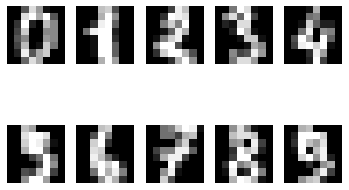

In [25]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

### EDA

In [70]:
from sklearn.manifold import TSNE

# t-SNE 모델 생성 및 학습
# 시각화

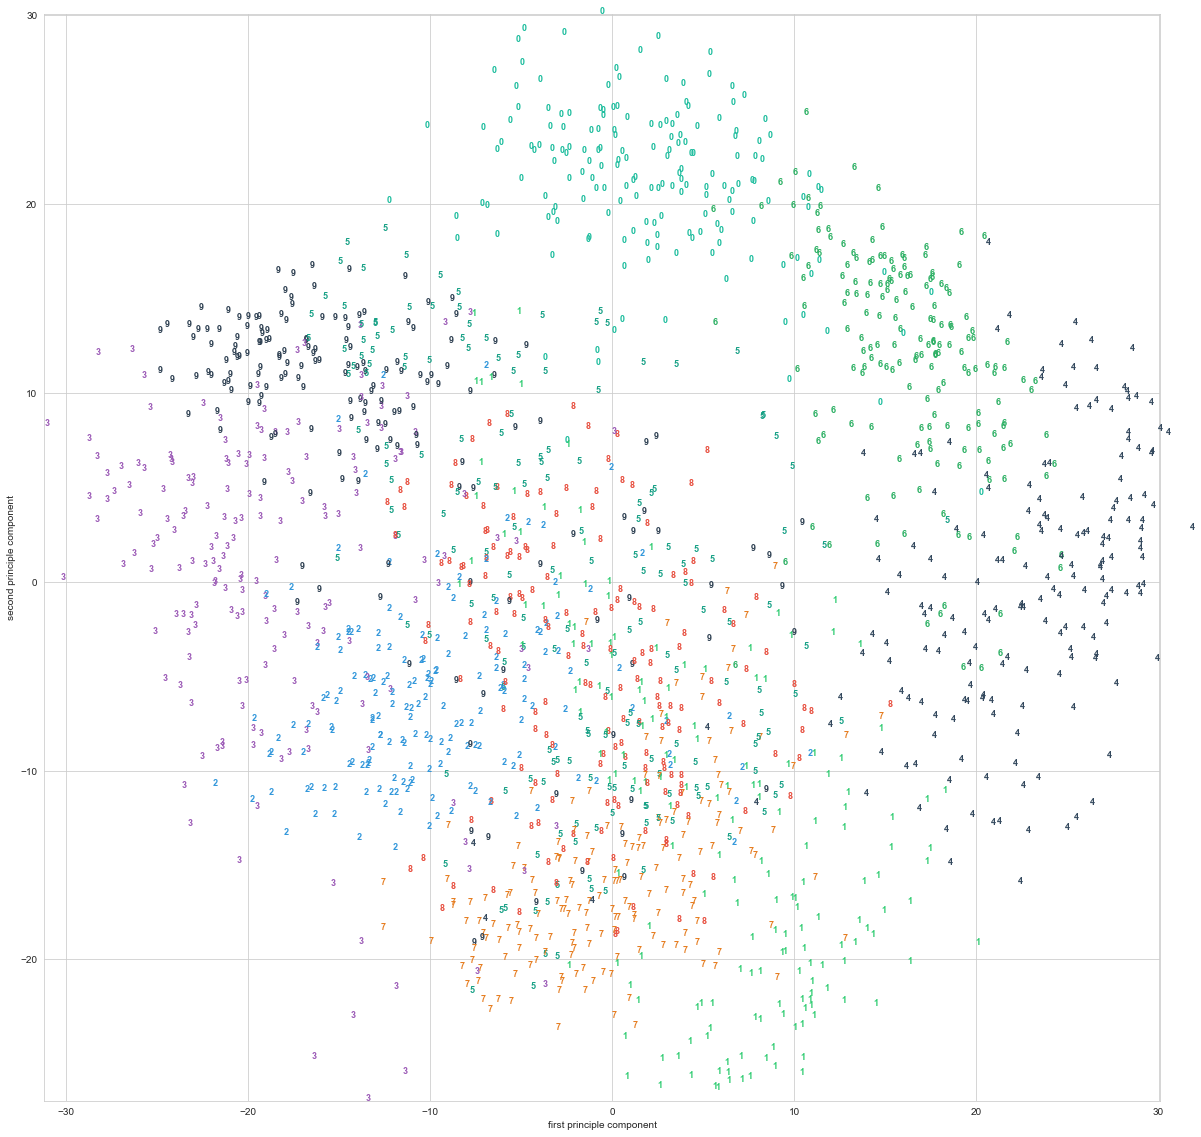

In [69]:
from sklearn.decomposition import PCA
plt.figure(figsize=(20,20))
# PCA 모델을 생성
pca = PCA(n_components=2) # 주성분 갯수
pca.fit(digits.data) # PCA 적용


# 두 개의 주성분으로 숫자 데이터를 변환
digits_pca = pca.transform(digits.data) 

color_list = ['#1abc9c','#2ecc71','#3498db','#9b59b6','#34495e',
             '#16a085','#27ae60','#e67e22','#e74c3c','#2c3e50']


for i in range(len(digits_db.data)): # digits.data의 길이까지 정수 갯수

    # 숫자 텍스트를 이용해 산점도 그리기
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), # x, y, 그룹; str은 문자로 변환
             color=color_list[digits_db.target[i]], # 산점도 색상
             fontdict={'weight':'bold', 'size':9}) # font 설정

plt.xlim(digits_pca[:, 0].min(), digits_pca[:,1].max()) # 최소, 최대
plt.ylim(digits_pca[:, 1].min(), digits_pca[:,1].max()) # 최소, 최대
plt.xlabel('first principle component') # x 축 이름
plt.ylabel('second principle component') # y 축 이름
plt.show()

### 훈련 / 테스트 데이터 준비 및 모델링

In [26]:
from sklearn.model_selection import train_test_split

X = digits_df.drop('label', axis=1)
y = digits_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=7)

In [27]:
print("X_train의 크기: {}".format(X_train.shape))
print("y_train의 크기: {}".format(X_train.shape))

X_train의 크기: (1437, 64)
y_train의 크기: (1437, 64)


In [28]:
print("X_test의 크기: {}".format(X_test.shape))
print("y_test의 크기: {}".format(y_test.shape))

X_test의 크기: (360, 64)
y_test의 크기: (360,)


In [45]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.linear_model import SGDClassifier as sgd
from sklearn.svm import SVC as svm
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [46]:
models = {
    'DecisionTree': dt(),
    'RandomForest': rf(),
    'SVM': svm(),
    'SGD': sgd(),
    'Logistic Regression': lr()
}

In [47]:
# Decision Tree Pipeline
pipeline_dt = Pipeline([('scaler1', StandardScaler()),
                        ("dt_classifier", dt())]
                        )
# RandomForest Pipeline
pipeline_rf = Pipeline([('scaler2', StandardScaler()),
                        ("rf_classifier", rf())]
                        )
# SVM Pipeline
pipeline_svm = Pipeline([('scaler3', StandardScaler()),
                        ("svm_classifier", svm())]
                        )
# SGD Pipeline
pipeline_sgd = Pipeline([('scaler4', StandardScaler()),
                        ("sgd_classifier", sgd())]
                        )
# Logisitc Regression Pipeline
pipeline_lr = Pipeline([('scaler5', StandardScaler()),
                        ("lr_classifier", lr())]
                        )

In [48]:
pipelines = [
    pipeline_dt,
    pipeline_rf,
    pipeline_svm,
    pipeline_sgd,
    pipeline_lr
]

In [49]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [50]:
model_list = list(models.keys())
test_scores = []

for i, model in enumerate(pipelines):
    score = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=5)
    score = np.mean(score)
    score = int(round(score, 2) * 100)
    test_scores.append(score)
    print("{} Test Accuracy: {}%".format(model_list[i], test_scores[i]))

DecisionTree Test Accuracy: 70%
RandomForest Test Accuracy: 92%
SVM Test Accuracy: 95%
SGD Test Accuracy: 92%
Logistic Regression Test Accuracy: 94%


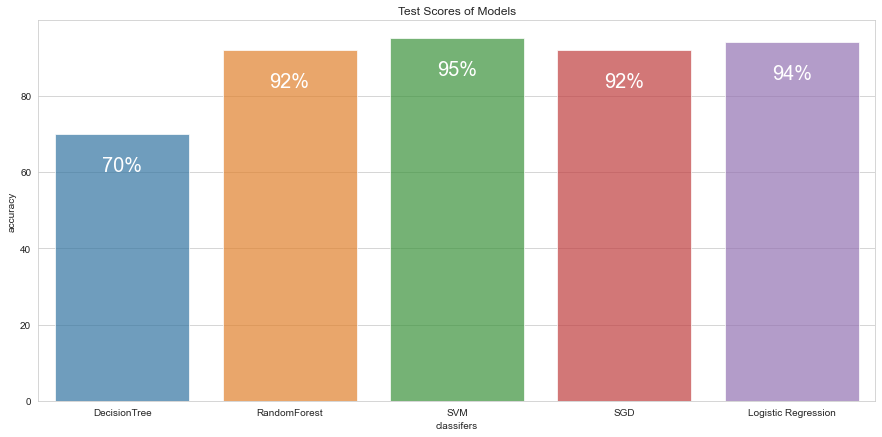

In [51]:
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')
plt.title('Test Scores of Models')

ax1 = sns.barplot(x=model_list, y=test_scores, alpha=0.7)
for p in ax1.patches:
    ax1.annotate(f'\n{int(p.get_height())}%', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=20)
    
plt.xlabel('classifers')
plt.ylabel('accuracy')
plt.show()

In [52]:
cm_list = [] 

for pipe in pipelines:
    print("---------------------------------------------------------")    
    y_pred = pipe.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_list.append(cm)
    print('estimator : {}\n'.format(pipe))
    print("classification Report: \n{}\n".format(classification_report(y_pred, y_test)))

---------------------------------------------------------
estimator : Pipeline(steps=[('scaler1', StandardScaler()),
                ('dt_classifier', DecisionTreeClassifier())])

classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.86      0.82      0.84        44
           2       0.85      0.83      0.84        41
           3       0.88      0.88      0.88        34
           4       0.95      0.85      0.90        41
           5       0.96      0.87      0.92        31
           6       0.93      0.87      0.90        30
           7       0.79      0.93      0.85        28
           8       0.65      0.80      0.72        35
           9       0.81      0.79      0.80        33

    accuracy                           0.86       360
   macro avg       0.87      0.86      0.86       360
weighted avg       0.87      0.86      0.86       360


------------------------------------

In [58]:
def show_confusion_matrix(cm_list,model_list, i, j):
    idx = 1
    for cm, model in zip(cm_list,model_list):
        if idx <= (i * j):
            plt.figure(figsize=(15,15))
            plt.subplot(i, j, idx)
            cm_matrix = pd.DataFrame(data=cm)
            sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Greens').set_title('Confusion Matrix of {}'.format(model))
        else:
            break
    plt.show()

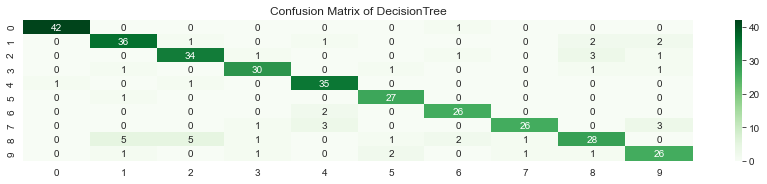

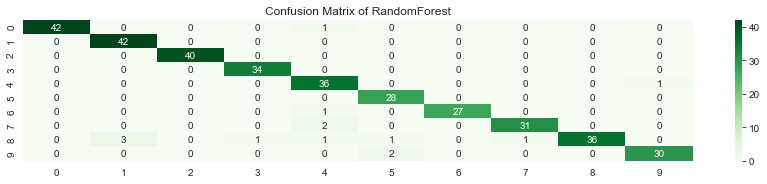

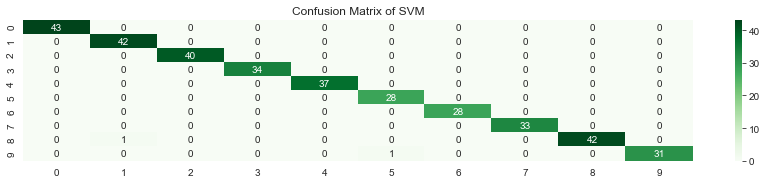

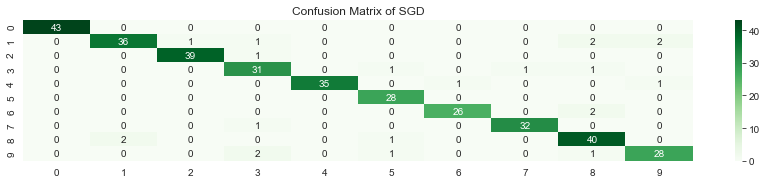

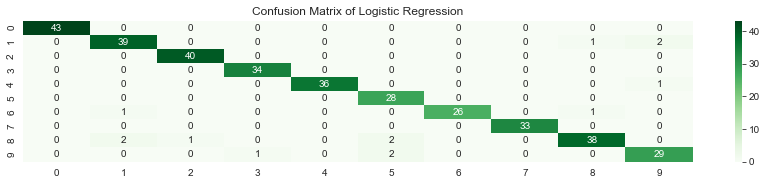

In [59]:
show_confusion_matrix(cm_list,model_list, 5, 1)

In [61]:
results = {
    'Accuracy Scores of Models' : test_scores
}

In [62]:
results_df = pd.DataFrame(results, index=model_list)
results_df

,Accuracy Scores of Models
DecisionTree,70
RandomForest,92
SVM,95
SGD,92
Logistic Regression,94


###  어떤 평가 기준을 선택해야할까?
```
숫자 분류에서는 여러가지 모델의 성능 지표 중 accuracy를 사용한다. 
다른 예제들 처럼 recall 혹은 precision을 반드시 고려해야 하는 문제가 아니기 때문이다.
그래서 5개 모델 중에 accuracy가 가장 높은 SVM 분류기를 사용하면 좋을 것 같다.
```